In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
csv_path = "D:\\Reddit_Comment_Project\\archive\\final_clean_5.csv"

df = pd.read_csv(csv_path)

display(df.head(20))

,comment_id,score,subreddit,post_id,author_name,controversiality,user_total_karma,post_score,post_upvote_ratio,self_text,post_title
0,cm3dnw7,1,RussiaDenies,2m33hb,Player276,0,75258.0,5,0.57,lol title can not deny accusation,russia deny nato accusation troop ukraine
1,cmqs3d9,1,RussiaDenies,2ov646,Martenz05,0,49520.0,5,0.62,article estonian english translation ...,russia deny violate estonian airspace english ...
2,cmv6omo,2,RussiaDenies,2p9hv1,CanadaDry95,0,7071.0,14,0.75,putin outsmart gt everybody,russias defense ministry sunday deny swedish...
3,codh5tc,1,UkrainePics,2ueefh,ms_kat_d,0,4046.0,20,1.00,highly idyllic stuff nice,carpathian mountain western ukraine vlad sok...
4,covo4um,3,UkrainePics,2x06n4,I_AM_STILL_A_IDIOT,0,901387.0,18,0.93,thank yougallowboob share album,unfortunate reality war eastern ukraine ...
5,cp2t1z0,3,RussiaDenies,2xrsz3,MaltyBeverage,0,49800.0,17,0.87,russia confirm putin awesome russia confirm ...,russia deny cameras nemtsovs murder
6,cpv150u,2,RussiaDenies,30r8qq,The_Good_Stuffs,0,65.0,6,0.75,tend believe russians even hard b...,russia deny air traffic controller fault k...
7,cxd26dh,4,RussiaDenies,3u39er,Xecutor,0,37976.0,46,0.88,russia deny title russia deny innocent,russia innocent
8,cyg2591,6,RussiaDenies,3yq1af,chetmanly2,0,7065.0,11,1.00,russia also deny finland,russia deny claim syriabound missile fall iran
9,d26j63i,1,RussiaDenies,4f7hcs,autotldr,0,3973420.0,17,0.95,well tldr could make reduce bot gt...,russia deny claim jet barrelrolle us reco...


In [3]:
# Fill NaN values with 'no text'
df['self_text'].fillna('no text', inplace=True)

# Fill NaN values with 'no text'
df['post_title'].fillna('no text', inplace=True)

In [5]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

# Download necessary NLTK resources if not already downloaded
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis on text data
"""
def analyze_sentiment(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Generate n-grams
    ngram_tokens = [' '.join(ngram) for ngram in list(ngrams(tokens, 3))]
    # Analyze sentiment for each n-gram
    sentiment_scores = [sid.polarity_scores(ngram)['compound'] for ngram in ngram_tokens]
    # Return average sentiment score
    return sum(sentiment_scores) / len(sentiment_scores)
"""
def analyze_sentiment(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Generate n-grams
    ngram_tokens = [' '.join(ngram) for ngram in list(ngrams(tokens, 3))]
    # Analyze sentiment for each n-gram
    sentiment_scores = [sid.polarity_scores(ngram)['compound'] for ngram in ngram_tokens]
    # Check if sentiment_scores is empty
    if len(sentiment_scores) > 0:
        # Return average sentiment score
        return sum(sentiment_scores) / len(sentiment_scores)
    else:
        # If sentiment_scores is empty, return 0
        return 0.0


# Perform sentiment analysis on self_text column
df['self_text_sentiment'] = df['self_text'].apply(analyze_sentiment)

# Extract unique post titles
unique_titles = df['post_title'].unique()

# Perform sentiment analysis on unique post titles
title_sentiments = {}
for title in unique_titles:
    title_sentiments[title] = analyze_sentiment(title)

# Map sentiment scores to original DataFrame
df['post_title_sentiment'] = df['post_title'].map(title_sentiments)

# Display the updated DataFrame
display(df.head(10))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,comment_id,score,subreddit,post_id,author_name,controversiality,user_total_karma,post_score,post_upvote_ratio,self_text,post_title,self_text_sentiment,post_title_sentiment
0,cm3dnw7,1,RussiaDenies,2m33hb,Player276,0,75258.0,5,0.57,lol title can not deny accusation,russia deny nato accusation troop ukraine,0.274175,-0.341675
1,cmqs3d9,1,RussiaDenies,2ov646,Martenz05,0,49520.0,5,0.62,article estonian english translation ...,russia deny violate estonian airspace english ...,0.000721,-0.265071
2,cmv6omo,2,RussiaDenies,2p9hv1,CanadaDry95,0,7071.0,14,0.75,putin outsmart gt everybody,russias defense ministry sunday deny swedish...,0.273200,-0.062225
3,codh5tc,1,UkrainePics,2ueefh,ms_kat_d,0,4046.0,20,1.00,highly idyllic stuff nice,carpathian mountain western ukraine vlad sok...,0.210750,0.000000
4,covo4um,3,UkrainePics,2x06n4,I_AM_STILL_A_IDIOT,0,901387.0,18,0.93,thank yougallowboob share album,unfortunate reality war eastern ukraine ...,0.433950,-0.396660
5,cp2t1z0,3,RussiaDenies,2xrsz3,MaltyBeverage,0,49800.0,17,0.87,russia confirm putin awesome russia confirm ...,russia deny cameras nemtsovs murder,-0.019874,-0.456933
6,cpv150u,2,RussiaDenies,30r8qq,The_Good_Stuffs,0,65.0,6,0.75,tend believe russians even hard b...,russia deny air traffic controller fault k...,-0.097371,-0.326800
7,cxd26dh,4,RussiaDenies,3u39er,Xecutor,0,37976.0,46,0.88,russia deny title russia deny innocent,russia innocent,-0.255000,0.000000
8,cyg2591,6,RussiaDenies,3yq1af,chetmanly2,0,7065.0,11,1.00,russia also deny finland,russia deny claim syriabound missile fall iran,-0.340000,-0.136000
9,d26j63i,1,RussiaDenies,4f7hcs,autotldr,0,3973420.0,17,0.95,well tldr could make reduce bot gt...,russia deny claim jet barrelrolle us reco...,0.020001,-0.113333


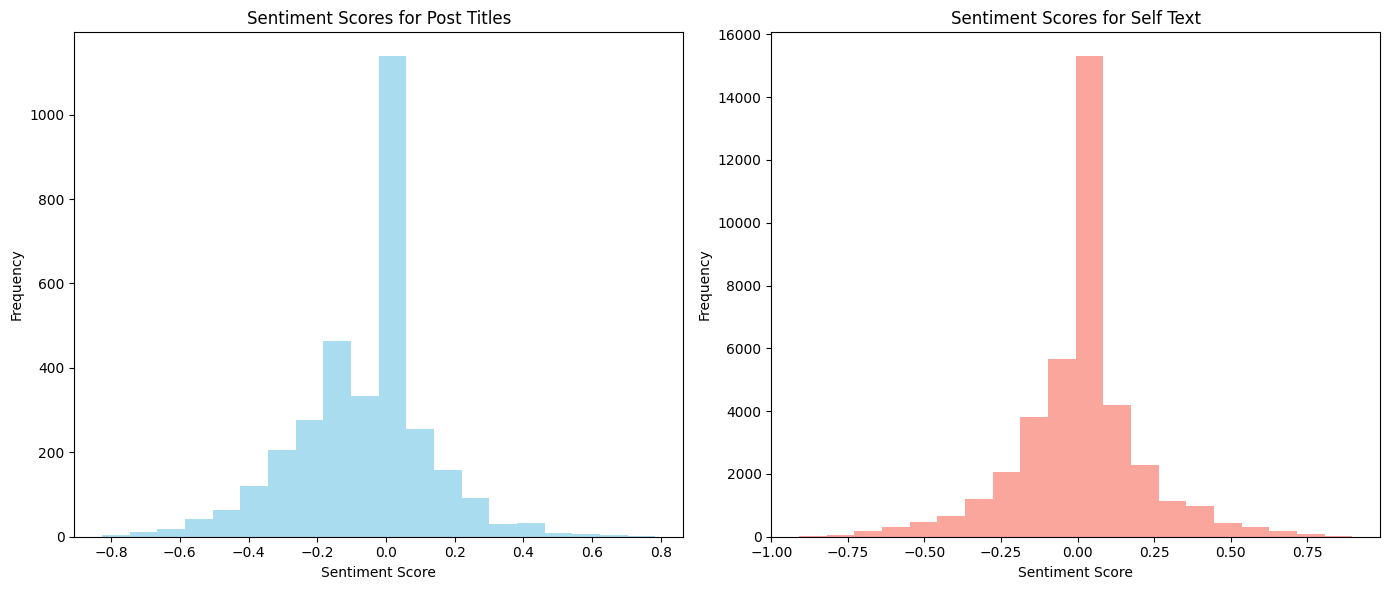

Descriptive Statistics for Sentiment Scores of Post Titles:
count    3269.000000
mean       -0.065043
std         0.190864
min        -0.826267
25%        -0.170000
50%         0.000000
75%         0.000000
max         0.783940
Name: post_title_sentiment, dtype: float64

Descriptive Statistics for Sentiment Scores of Self Text:
count    39357.000000
mean         0.000899
std          0.201411
min         -0.910000
25%         -0.077025
50%          0.000000
75%          0.080380
max          0.897900
Name: self_text_sentiment, dtype: float64


In [7]:
import matplotlib.pyplot as plt

# Aggregate sentiment scores for unique post titles and self_text
unique_titles_sentiment = df.groupby('post_title')['post_title_sentiment'].mean()
self_text_sentiment = df['self_text_sentiment']

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for post_title
axes[0].hist(unique_titles_sentiment, bins=20, color='skyblue', alpha=0.7)
axes[0].set_title('Sentiment Scores for Post Titles')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')

# Plot for self_text
axes[1].hist(self_text_sentiment, bins=20, color='salmon', alpha=0.7)
axes[1].set_title('Sentiment Scores for Self Text')
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Descriptive statistics using .describe()
post_title_describe = unique_titles_sentiment.describe()
self_text_describe = self_text_sentiment.describe()

print("Descriptive Statistics for Sentiment Scores of Post Titles:")
print(post_title_describe)
print("\nDescriptive Statistics for Sentiment Scores of Self Text:")
print(self_text_describe)
